(64, 82, 3)
[[  4  23 122  59]]


TypeError: 'int' object is not callable

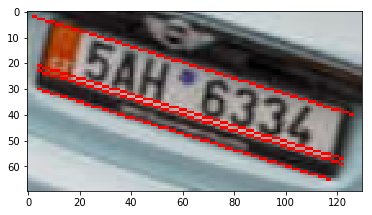

In [412]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

% matplotlib inline

image = cv2.imread('D:/development/cv/ANPR-keras/images/test3.png')
print(image.shape)
image = cv2.resize(image, (130, 70))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 50  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 100  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(image) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

#print(lines)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 1)

plt.imshow(image)

lines = lines[0]
print(lines)

a1 = lines[0][0]
b1 = lines[0][1]
c1 = lines[0][3]

a2 = [0, 0]
b2 = [image.size().width, 0]
c2 = [image.size().width, image.size().height]

src = [a1, b1, c1]
dst = {a2, b2, c2}

tfm = cv2.getAffineTransform(src, dst)
dst_img = cv2.warpAffine(image, tfm, image.size())


cv2.line(dst_img, (x1, y1), (x2, y2), (255, 0, 0), 1)
